<a href="https://colab.research.google.com/github/Gilmaralexandre/Analise-Microdados-Enem/blob/main/An%C3%A1lise_Enem2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Microdados do Enem 2021

## Compreensão do contexto do projeto

### Dados disponíveis no site: dados.gov.br/enem (é necessário escolher qual o ano que deseja analisar.)

- O projeto tem alguns desafios, como:

1.  Tamanho do dataset, mais de 2 milhões de linhas e mais de 70 colunas
2.  Tirar algumas informações sobre carateristicas dos candidatos do ensino médio.
3.   Observar se questões sociais tem influencia no conjunto de dados como localidade, sexo, estado civil, cor da pele.
4.   Extrair informações confiaveis, isso necessita de uma boa limpeza e manipulação dos dados.






## Planejamento e coleta dos dados e informações necessárias.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

microdados = pd.read_csv('/content/drive/MyDrive/analise_dados/Dados_Enem/DADOS/MICRODADOS_ENEM_2021.csv', sep = ';', encoding = 'ISO-8859-1')

In [6]:
microdados.shape

(2685053, 76)

In [7]:
microdados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [8]:
colunas_selecionadas = ['TP_FAIXA_ETARIA','TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

In [9]:
df = microdados.filter(items = colunas_selecionadas)

## Conhecendo o conjunto de dados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685053 entries, 0 to 2685052
Data columns (total 49 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TP_FAIXA_ETARIA         int64  
 1   TP_SEXO                 object 
 2   TP_ESTADO_CIVIL         int64  
 3   TP_COR_RACA             int64  
 4   TP_NACIONALIDADE        int64  
 5   TP_ST_CONCLUSAO         int64  
 6   TP_ANO_CONCLUIU         int64  
 7   TP_ESCOLA               int64  
 8   TP_ENSINO               float64
 9   IN_TREINEIRO            int64  
 10  CO_MUNICIPIO_ESC        float64
 11  NO_MUNICIPIO_ESC        object 
 12  CO_UF_ESC               float64
 13  SG_UF_ESC               object 
 14  TP_DEPENDENCIA_ADM_ESC  float64
 15  TP_LOCALIZACAO_ESC      float64
 16  TP_SIT_FUNC_ESC         float64
 17  CO_MUNICIPIO_PROVA      int64  
 18  NO_MUNICIPIO_PROVA      object 
 19  CO_UF_PROVA             int64  
 20  SG_UF_PROVA             object 
 21  TP_PRESENCA_CN          int64  

In [11]:
# Inicialmente vamos analisar a variavel TP_FAIXA_ETARIA
df['TP_FAIXA_ETARIA'].value_counts()

3     617793
2     556833
4     330953
1     230618
5     200433
11    139229
6     133935
7      95589
12     76362
8      69978
9      57660
13     54026
10     45998
14     33927
15     20690
16     11583
17      5998
18      2310
19       789
20       349
Name: TP_FAIXA_ETARIA, dtype: int64

In [12]:
# No conjunto de dados, algumas colunas estão com as informaçoes sumarizadas pelo dicionário de dados disponibilizado 
# Sendo asssim vou consultar o dicionário(está disponível no formato xlsx) e criar um dicionário para posteriormente criar uma coluna com os dados.
dic_fx_etaria = {1:'Menor de 17 anos',
                2:'17 anos',
                3:'18 anos',
                4:'19 anos',
                5:'20 anos',
                6:'21 anos',
                7:'22 anos',
                8:'23 anos',
                9:'24 anos',
                10:'25 anos',
                11:'Entre 26 e 30 anos',
                12:'Entre 31 e 35 anos',
                13:'Entre 36 e 40 anos',
                14:'Entre 41 e 45 anos',
                15:'Entre 46 e 50 anos',
                16:'Entre 51 e 55 anos',
                17:'Entre 56 e 60 anos',
                18:'Entre 61 e 65 anos',
                19:'Entre 66 e 70 anos',
                20:'Maior de 70 anos'}

In [13]:
# Criando um novo dataframe com as colunas desejadas
microdados.columns
df_faixa_etaria = microdados[['NU_INSCRICAO','TP_FAIXA_ETARIA']]

In [14]:
# Criando a coluna com o list comprehension
# A estrutura seria [x for x in df]
df_faixa_etaria['dic_faixa_etaria'] = [dic_fx_etaria[x] for x in df_faixa_etaria.TP_FAIXA_ETARIA]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df_faixa_etaria.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,dic_faixa_etaria
0,210053865474,5,20 anos
1,210052384164,12,Entre 31 e 35 anos
2,210052589243,13,Entre 36 e 40 anos
3,210052128335,3,18 anos
4,210051353021,2,17 anos


In [16]:
# Posteriormente vou utilizar o groupby() e fazer um agrupamento da coluna dic_faixa_etaria e ter uma noção da idade dos candidatos do enem 2021.
df_faixa_etaria.groupby('dic_faixa_etaria').count().sort_values(by = 'TP_FAIXA_ETARIA', ascending=False)

,NU_INSCRICAO,TP_FAIXA_ETARIA
dic_faixa_etaria,,
18 anos,617793,617793
17 anos,556833,556833
19 anos,330953,330953
Menor de 17 anos,230618,230618
20 anos,200433,200433
Entre 26 e 30 anos,139229,139229
21 anos,133935,133935
22 anos,95589,95589
Entre 31 e 35 anos,76362,76362


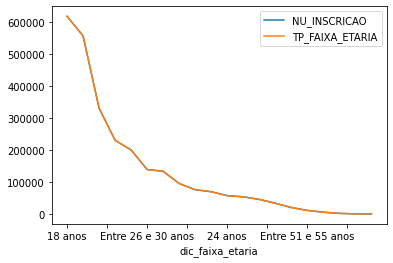

In [17]:
# Visualizanda a disitribuição das idades
fx_et_plot = df_faixa_etaria.groupby('dic_faixa_etaria').count().sort_values(by = 'TP_FAIXA_ETARIA', ascending=False)
fx_et_plot.plot()

#### Insights dessa primeira análise

**Tiramos algumas informações relevantes como:**


*   Existe uma tendencia de quanto menor a idade maior a quantidade de candidatos.
*   A idade mais frequente é 18 anos.
*   Apesar de em menor numero temos pessoas com mais de 60 anos.



In [18]:
# Distribuição média por genero 
sexo = df['TP_SEXO'].value_counts().head()/df.TP_SEXO.shape[0]*100
sexo

F    62.794217
M    37.205783
Name: TP_SEXO, dtype: float64

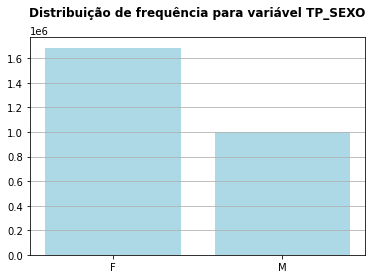

In [19]:
plt.bar(df.TP_SEXO.unique(), df.TP_SEXO.value_counts(), color = 'lightblue')
plt.title('Distribuição de frequência para variável TP_SEXO\n', {'fontsize': 12,'fontweight': 'bold'})
plt.grid(axis = 'y')
plt.show()

In [20]:
# Realizando uma análise de genero com a notas de redação

df_red = df[['NU_NOTA_REDACAO','TP_SEXO']]
df_red.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1284798.0  633.999493  188.313942  0.0  540.0  620.0  760.0   
M              756975.0  606.498471  192.433705  0.0  520.0  600.0  720.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

**Percebemos que sobre o genero:**



1.   As mulheres foi maioria no teste com 62% dos condidatos
2.   As mulheres tambem obtiveram em média notas melhores, apesar que em diferenças pequenas.



TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

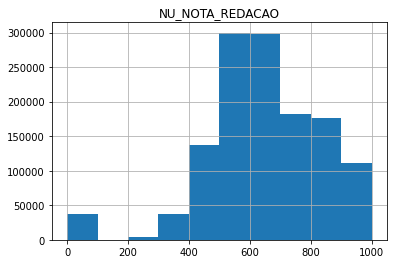

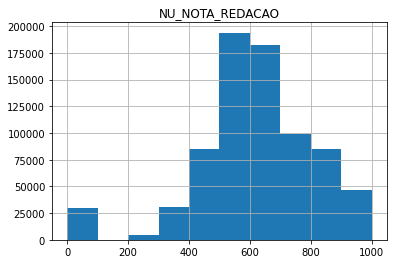

In [21]:
# Com o histograma visualizamos que as mulheres teve uma concentração maior em todas as notas de redação. **também tirou mais zeros
df_red.groupby('TP_SEXO').hist()

In [22]:
# Numero do municipio está muito inconsistente pela quantidade de valores nulos.
# Sendo assim a próxima etapa será a de limpeza dos dados.
print('5 Maiores municipios\n')

print(df['NO_MUNICIPIO_ESC'].value_counts().head())
print('**********************')
print('15 Menores municipios\n')
print(df['NO_MUNICIPIO_ESC'].value_counts().tail(5))

5 Maiores municipios

São Paulo         32884
Fortaleza         27232
Rio de Janeiro    21793
Brasília          14763
Manaus            14603
Name: NO_MUNICIPIO_ESC, dtype: int64
**********************
15 Menores municipios

Nova Aliança do Ivaí    1
Goiabeira               1
Cedro do Abaeté         1
Marajá do Sena          1
Inúbia Paulista         1
Name: NO_MUNICIPIO_ESC, dtype: int64


In [23]:
# Vamos analisar a localidade
df_cidade_estado = microdados[['NU_INSCRICAO','NO_MUNICIPIO_PROVA', 'SG_UF_PROVA']]
df_estado = microdados[['NU_INSCRICAO', 'SG_UF_PROVA']]

**Objetivo é criar uma coluna com as regiões do brasil**

- Centro-Oeste são: Goiás, Mato Grosso, Mato Grosso do Sul e o Distrito Federal.
- Norte abriga os seguintes estados: Acre, Amazonas, Amapá, Pará, Rondônia, Roraima e Tocantins.
- Nordeste abrange Alagoas, Bahia, Ceará, Maranhão, Piauí, Pernambuco, Paraíba, Rio Grande do Norte e Sergipe.
- Sul é composto por Paraná, Rio Grande do Sul e Santa Catarina.
- Sudeste abriga os estados do Espírito Santo, Minas Gerais, Rio de Janeiro e São Paulo.

In [24]:
df_estado['SG_UF_PROVA'].unique()

array(['MG', 'AL', 'SP', 'CE', 'RS', 'BA', 'GO', 'RN', 'PA', 'RJ', 'MT',
       'PE', 'MA', 'RO', 'SE', 'PR', 'PB', 'PI', 'ES', 'DF', 'TO', 'AM',
       'SC', 'AP', 'MS', 'RR', 'AC'], dtype=object)

In [25]:
dict_reg = {
       'MG':'SUDESTE','ES':'SUDESTE','SP':'SUDESTE','RJ':'SUDESTE',
       'PR':'SUL','RS':'SUL','SC':'SUL',
       'GO':'CENTRO_OESTE','MT':'CENTRO_OESTE','MS':'CENTRO_OESTE','DF':'CENTRO_OESTE',
       'PA':'NORTE','AM':'NORTE','AP':'NORTE','AC':'NORTE','RO':'NORTE','RR':'NORTE','TO':'NORTE',
       'AL':'NORDESTE','BA':'NORDESTE','MA':'NORDESTE','PI':'NORDESTE','PE':'NORDESTE','PB':'NORDESTE','RN':'NORDESTE','SE':'NORDESTE','CE':'NORDESTE'
}

df_estado['reg'] = [dict_reg[y] for y in df_estado.SG_UF_PROVA]
df_estado.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,NU_INSCRICAO,SG_UF_PROVA,reg
0,210053865474,MG,SUDESTE
1,210052384164,AL,NORDESTE
2,210052589243,SP,SUDESTE
3,210052128335,CE,NORDESTE
4,210051353021,CE,NORDESTE


In [26]:
df_estado.groupby('SG_UF_PROVA').count().sort_values(by = 'NU_INSCRICAO', ascending = False)

,NU_INSCRICAO,reg
SG_UF_PROVA,,
SP,400583,400583
MG,256905,256905
BA,208034,208034
CE,195231,195231
RJ,186691,186691
PE,157963,157963
PA,141384,141384
RS,117530,117530
GO,116367,116367


In [27]:
df_estado.groupby('reg').count().sort_values(by = 'NU_INSCRICAO', ascending = False)

,NU_INSCRICAO,SG_UF_PROVA
reg,,
NORDESTE,959926,959926
SUDESTE,895047,895047
SUL,294915,294915
NORTE,291168,291168
CENTRO_OESTE,243997,243997


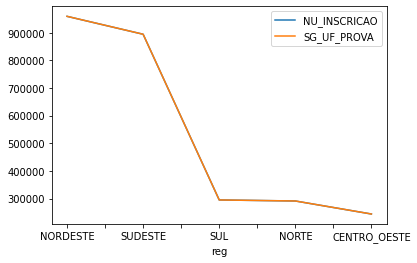

In [28]:
df_estado_plot = df_estado.groupby('reg').count().sort_values(by = 'NU_INSCRICAO', ascending = False)
df_estado_plot.plot()

#### Na análise de localidade, visualizamos que:

- A tendencia os estados com mais numeros de candidatos foram SP E MG que realmente já possui essa marca de longos anos.
- Mesmo o Sudeste tendo os maiores colegios, a região que mais obteve candidatos foi o nordeste.

#### Limpeza dos dados

- Com a intenção de realizar análises mais robustas, será necessário fazer uma limpeza e manipulação de dados.
- Primeiro com uma função que drop as colunas com mais de 50% dos dados faltantes.

In [29]:
#Valores nulos 
#Inicializar limpeza
df.isnull().sum()/df.shape[0]*100

TP_FAIXA_ETARIA            0.000000
TP_SEXO                    0.000000
TP_ESTADO_CIVIL            0.000000
TP_COR_RACA                0.000000
TP_NACIONALIDADE           0.000000
TP_ST_CONCLUSAO            0.000000
TP_ANO_CONCLUIU            0.000000
TP_ESCOLA                  0.000000
TP_ENSINO                 63.452565
IN_TREINEIRO               0.000000
CO_MUNICIPIO_ESC          73.173341
NO_MUNICIPIO_ESC          73.173341
CO_UF_ESC                 73.173341
SG_UF_ESC                 73.173341
TP_DEPENDENCIA_ADM_ESC    73.173341
TP_LOCALIZACAO_ESC        73.173341
TP_SIT_FUNC_ESC           73.173341
CO_MUNICIPIO_PROVA         0.000000
NO_MUNICIPIO_PROVA         0.000000
CO_UF_PROVA                0.000000
SG_UF_PROVA                0.000000
TP_PRESENCA_CN             0.000000
TP_PRESENCA_CH             0.000000
TP_PRESENCA_LC             0.000000
TP_PRESENCA_MT             0.000000
CO_PROVA_CN               27.721985
CO_PROVA_CH               23.957814
CO_PROVA_LC               23

In [47]:
def Preprocessamento(df):
    df_nv = df.copy()
    trat1 = (df.isnull().sum()/df.shape[0])>=0.6
    var_drop = trat1.loc[trat1==True].index.tolist()
    
    for x in var_drop:
        df_nv = df_nv.drop(x,axis=1)

    return df_nv

In [48]:
df_nv =  Preprocessamento(df = df)

In [49]:
df_nv.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_PROVA,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,5,F,1,1,1,1,3,1,0,3144805,...,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0
1,12,M,1,1,1,1,11,1,0,2704302,...,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0
2,13,F,3,1,1,1,15,1,0,3515707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,M,1,3,1,2,0,2,0,2304202,...,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0
4,2,F,1,3,1,2,0,2,0,2300150,...,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0


In [50]:
nulos = df_nv.isnull().sum()[df_nv.isnull().sum()>0].sort_values(ascending = False)
nulos/df_nv.shape[0]*100

CO_PROVA_CN          27.721985
NU_NOTA_MT           27.721985
TX_GABARITO_MT       27.721985
TX_GABARITO_CN       27.721985
TX_RESPOSTAS_CN      27.721985
TX_RESPOSTAS_MT      27.721985
NU_NOTA_CN           27.721985
CO_PROVA_MT          27.721985
NU_NOTA_LC           23.957814
TP_STATUS_REDACAO    23.957814
NU_NOTA_COMP5        23.957814
NU_NOTA_COMP4        23.957814
NU_NOTA_COMP3        23.957814
NU_NOTA_COMP2        23.957814
NU_NOTA_COMP1        23.957814
TX_GABARITO_LC       23.957814
CO_PROVA_LC          23.957814
NU_NOTA_CH           23.957814
TX_GABARITO_CH       23.957814
CO_PROVA_CH          23.957814
TX_RESPOSTAS_LC      23.957814
TX_RESPOSTAS_CH      23.957814
NU_NOTA_REDACAO      23.957814
dtype: float64